importing necessary packages and libraries

In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import eig
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

loading dataset(breast cancer)

This dataset has details about the breast cancer cells, their size,area,shape and other details
it has total of 32 columns and 569 records

In [2]:
data=pd.read_csv("breast_cancer.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

checking the percentage of null values in the dataset

In [4]:
(data.isnull().sum().sum())/len(data)

0.0

checking the descriptive statistics of the dataset

In [5]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
print("The shape of this dataset is",data.shape)

The shape of this dataset is (569, 32)


using this data we predict diagnosis of breast tissues (M = malignant, B = benign) using all other coulumns that determine the charecterstics of cancer cells
so we take the 'diagnosis' column as output column

In [7]:
out=data['diagnosis']
out.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

we drop Id column and out put column

In [8]:
data=data.drop(['id','diagnosis'],axis=1)

In [9]:
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
print("The shape of dataset after removing 2 columns",data.shape)

The shape of dataset after removing 2 columns (569, 30)


# visualising data

<Figure size 1152x576 with 0 Axes>

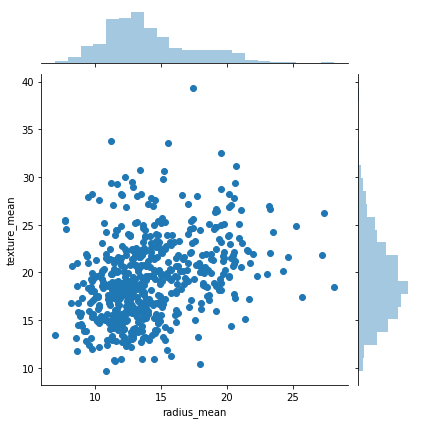

In [11]:
plt.figure(figsize=(16,8))
sb.jointplot(data['radius_mean'],data['texture_mean'])

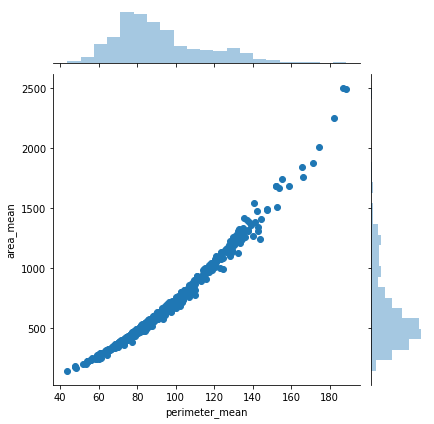

In [12]:
sb.jointplot(data['perimeter_mean'],data['area_mean'])

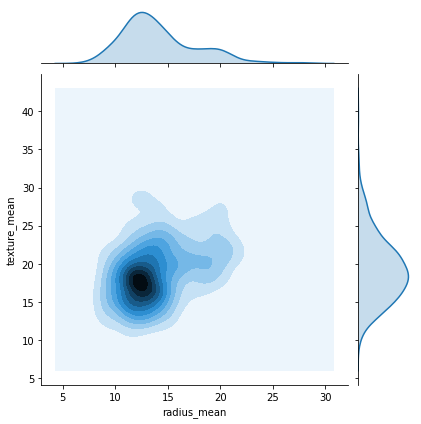

In [13]:
sb.jointplot(data['radius_mean'],data['texture_mean'],kind='kde')

Text(0.5, 1.0, 'SMOOTHNESS VS COMPACTNESS')

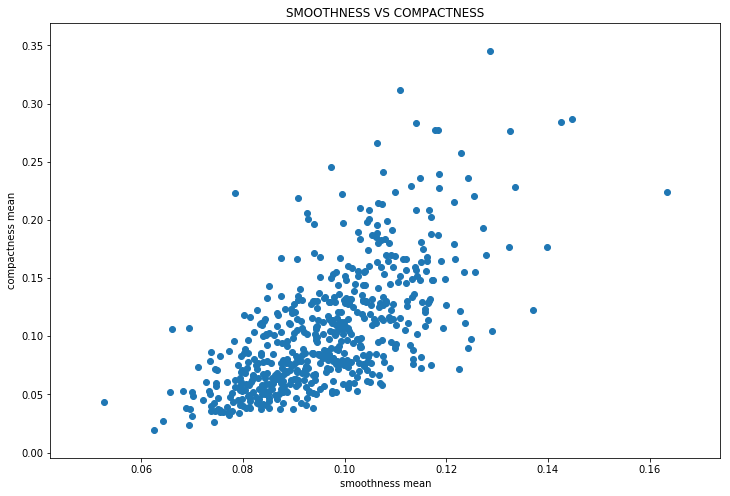

In [14]:
plt.figure(figsize=(12,8))
plt.scatter(data['smoothness_mean'],data['compactness_mean'])
plt.xlabel("smoothness mean")
plt.ylabel("compactness mean")
plt.title("SMOOTHNESS VS COMPACTNESS")

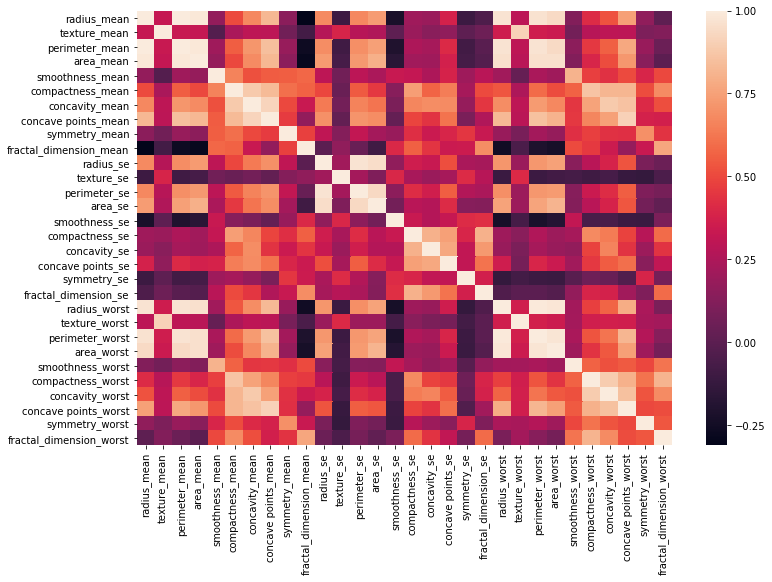

In [15]:
plt.figure(figsize=(12,8))
data_num=data._get_numeric_data()
correlation=data_num.corr()
correlation
sb.heatmap(correlation)

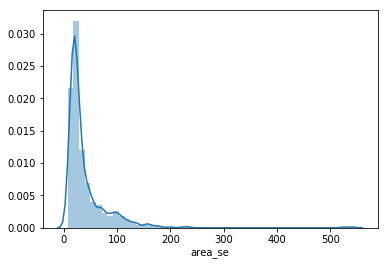

In [16]:
sb.distplot(data.area_se)

we observe that there are 32 features in the data
correlation between the features may effect the model
hence we use feature reduction method so that the prominant features can be used to build the model
PCA-Principle component analysis is one of the prominant reduction technique used


the test train split

In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(data,out,test_size=0.3)

model with out applying pca

Model---
since it is a classification i.e weather it is malignant or Benign 
we use Logistic regression as classifer to build and predict the model

In [18]:
from sklearn.linear_model import LogisticRegression
mlmod=LogisticRegression()
mlmod.fit(xtrain,ytrain)
ypred=mlmod.predict(xtest)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


the accuracy of trained model

In [19]:
from sklearn.metrics import accuracy_score
acc_without_pca=accuracy_score(ytest,ypred)
print("the accuracy of model without using PCA is",acc_without_pca)

the accuracy of model without using PCA is 0.9532163742690059


now we apply pca and build the model

PCA is effected by scale so we need to scale the features in your data before applying PCA. 
Use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms. 

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_data=sc.fit_transform(data)
sc_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

after standartizing data we use pca from sklearen package

In [21]:
#here we take number of features as 10
pcamod=PCA(10)
pca_data=pcamod.fit_transform(sc_data)
pca_data

array([[ 9.19283683,  1.94858307, -1.12316617, ..., -0.39840167,
        -0.15711636, -0.87740697],
       [ 2.3878018 , -3.76817174, -0.52929268, ...,  0.24098419,
        -0.7119076 ,  1.10699932],
       [ 5.73389628, -1.0751738 , -0.55174759, ...,  0.09737577,
         0.02406261,  0.45427149],
       ...,
       [ 1.25617928, -1.90229671,  0.56273053, ...,  0.34188448,
         0.39391535,  0.52088079],
       [10.37479406,  1.67201011, -1.87702933, ..., -0.28023391,
        -0.54203338, -0.08930083],
       [-5.4752433 , -0.67063679,  1.49044308, ...,  1.04635794,
         0.37409897, -0.0477317 ]])

In [22]:
pd.DataFrame(pca_data).head()

,0,1,2,3,4,5,6,7,8,9
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159369,-0.398402,-0.157116,-0.877407
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240984,-0.711908,1.106999
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668167,0.097376,0.024063,0.454271
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429909,1.059565,-1.405445,-1.116978
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936212,0.636376,-0.263804,0.377705


In [23]:
pcamod.explained_variance_

array([13.30499079,  5.7013746 ,  2.82291016,  1.98412752,  1.65163324,
        1.20948224,  0.67640888,  0.47745625,  0.41762878,  0.35131087])

test train split for PCA applied data

In [24]:
xtrain_pca,xtest_pca,ytrain_pca,ytest_pca=train_test_split(pca_data,out,test_size=0.3,random_state=48)

classification model with PCA data

In [25]:
mlmod_pca=LogisticRegression()
mlmod_pca.fit(xtrain_pca,ytrain_pca)
ypred_pca=mlmod_pca.predict(xtest_pca)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [26]:
#Accuracy score
acc_with_pca=accuracy_score(ytest_pca,ypred_pca)
print("the accuracy of model using PCA is",acc_with_pca)

the accuracy of model using PCA is 0.9824561403508771


we can observe that there is increase in the model accuracy in PCA data
PCA technique helps the Machine Learning model to work better

In [27]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(ytest,ypred_pca)

array([[54, 51],
       [44, 22]], dtype=int64)

In [28]:
print(classification_report(ytest,ypred_pca))

              precision    recall  f1-score   support

           B       0.55      0.51      0.53       105
           M       0.30      0.33      0.32        66

   micro avg       0.44      0.44      0.44       171
   macro avg       0.43      0.42      0.42       171
weighted avg       0.45      0.44      0.45       171

